In [1]:
import os 
os.chdir('/blue/pdixit/hodaakl/A5MCMC_IGF_FoxO/Code')

In [1]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 15})
from Update_LM_functions import calculate_constraints, update_lambda, openfile
from PredictionFunctions import solve_Moments_fn, FoxOn_preds_fn, Moments_Preds_full_fn

on_mac = False 
on_thinkpad = False 
on_hpg = True

In [2]:
if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder = data_path + 'A5MCMC_IGF_FoxO/'

folder_out = '0104_MuS/' #    Lambda = old_lambda.copy() + alpha_arr*(Error)/true_constraints

output_dir = spec_folder + folder_out

In [3]:
def Csv_to_Np(index = 0, dat = 'moments' , path = spec_folder + folder_out ): 
    if dat == 'moments':
        fn = path + f'moments_{index}.csv'
    if dat == 'lambdas':
        fn = path + f'Lambdas.csv'
    if dat == 'params': 
        fn = path + f'params_{index}.csv'
    
    df = pd.read_csv(fn, sep = ',', header = None) 
    
    table = df.to_numpy()
    return table
    

In [4]:
# we need to delete the last line here. 
err_fn = spec_folder + folder_out +  'Errors.csv'
acc_fn = spec_folder + folder_out + 'AccRatio.csv'
lambda_fn = spec_folder + folder_out + 'Lambdas.csv'
df_error = pd.read_csv(err_fn, sep = ',', header = None) 
err_np = df_error.to_numpy()
df_l = pd.read_csv(lambda_fn, sep = ',', header = None)
lambda_np = df_l.to_numpy()


read_dictionary = np.load(spec_folder + 'Arrays_for_max_ent/Cons_1213_MuS.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']


In [5]:

real_cons = read_dictionary['array']
mumu_data = np.mean(real_cons[:int(len(data)/2)])
mus_data = np.mean(real_cons[int(len(data)/2):])
print(mumu_data)
print(mus_data)

NameError: name 'data' is not defined

In [75]:
norm_vec = np.ones(len(real_cons))
norm_vec[:int(len(norm_vec)/2)] = norm_vec[:int(len(norm_vec)/2)]*mumu_data
norm_vec[int(len(norm_vec)/2):] = norm_vec[int(len(norm_vec)/2):]*mus_data

norm_vec

array([   386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
          386.70634374,    386.70634374,    386.70634374,    386.70634374,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 160583.89814648, 160583.89814648, 160583.89814648,
       160583.89814648, 1

### Plotting the error 

(18, 56)
(19, 56)
(18, 56)


Text(0.5, 0, 'Iteration')

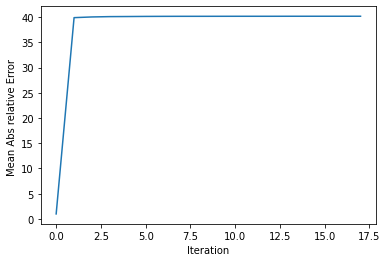

In [53]:
LatestIterI = lambda_np.shape[0] -2
print(err_np.shape)
print(lambda_np.shape)
lambda_np.shape
rc_m= np.tile(real_cons[:len(err_np[0,:])] , [err_np.shape[0],1])
print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(0,len(mean_rel_abs)), mean_rel_abs[0:])
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')
# plt.title('Iteration[1:]')

### Plotting the parameters 

In [54]:
param_np = Csv_to_Np(index = LatestIterI, dat = 'params')
param_np.shape

(11273, 14)

In [55]:
# mod = .25
par_dict = {'par_name': ['k1', 'k2','k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k_tot_Akt', 'k_tot_foxo']
            , 'low_lim_log':np.array([2.75,-3.5,-2.25,-0.5,-0.75,-0.75,-3.5,-6.75,-6,-3.75,-2.25,-2.5,4.25,2])
            , 'high_lim_log': np.array([4.25,-2,-0.75,1,0.75,0.75,-2,-5.25,-4.5,-2.25,-0.75,-1,5.75,3.5])
            , 'identifier': ['Receptor count ', 'Degredation of IGFR','Binding of IGFR to IGF','Unbinding IGFR to IGF ',
                      'Phosphorylation of bound receptor',  'Dephosphorylation of bound receptor ', 'Dephosphorylation of AKT',
                         'Phosphorylation of AKT', 'Phosphorylation of FoxO', 'Dephosphorylation of FoxO', 'Influx of FoxO to nucleus ',
                         'Efflux of FoxO from nucleus', 'k_tot_Akt', 'k_tot_foxo']}

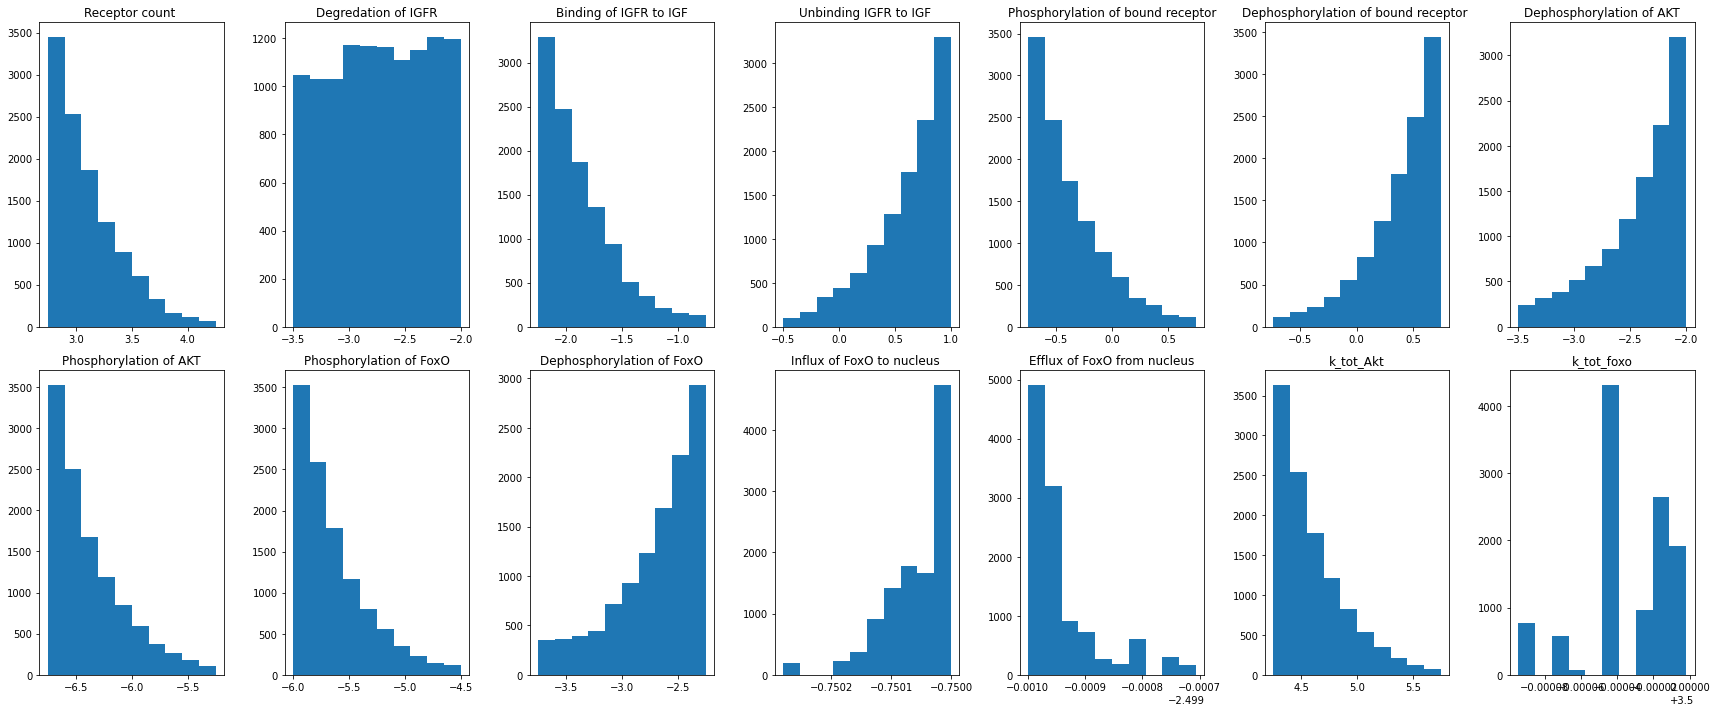

In [56]:
ns, nk = param_np.shape
fig, axs = plt.subplots(2,7, figsize = (24,10))
pi = 0; pj = 0
for i in range(nk):
    axs[pi, pj].hist(param_np[:,i])
    axs[pi, pj].set_title(par_dict['identifier'][i])
    ll = par_dict['low_lim_log'][i]
    lh = par_dict['high_lim_log'][i]
    x_ll = np.ones(10)*ll
    x_lh = np.ones(10)*lh
    y = np.arange(0,200,200/10)
#     axs[pi, pj].plot(x_ll, y, c = 'r')
#     axs[pi, pj].plot(x_lh, y, c = 'r')
    
    
    
#     axs[pi, pj].set_xlim([par_dict['low_lim_log'][i],  par_dict['high_lim_log'][i] ])
    pj+= 1
    if pj ==7:
        pj =0 
        pi +=1
    
plt.tight_layout()

### Plotting the lagrange multipliers 

In [57]:
len(cons_title)

56

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


IndexError: index 3 is out of bounds for axis 0 with size 3

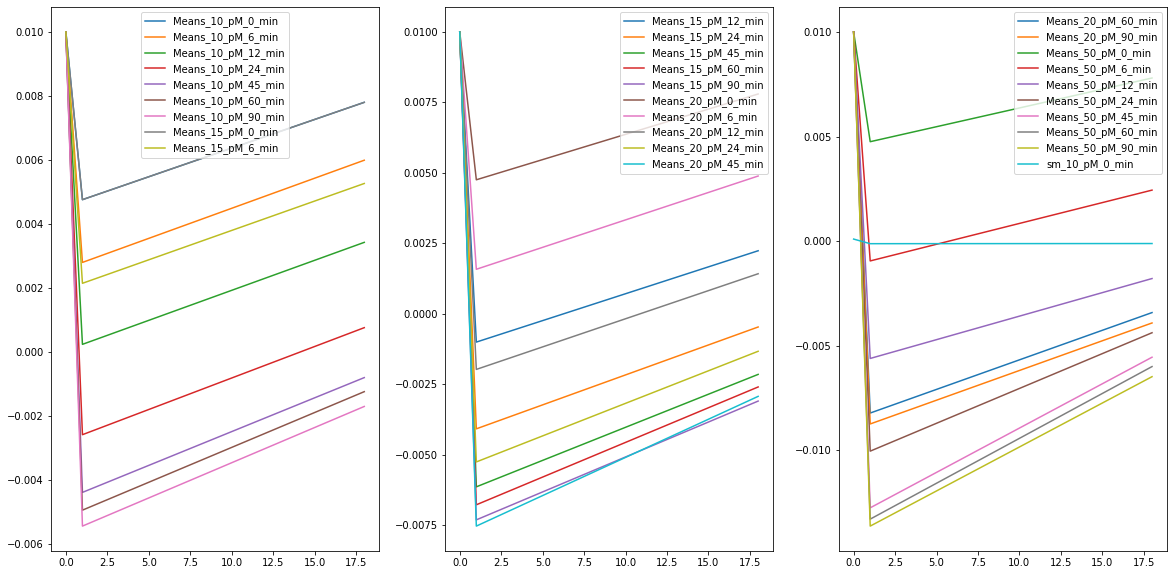

In [58]:
### label the plots 

cons_title = read_dictionary['labels']



fig, axs = plt.subplots(1,3, figsize = (20,10))

i=0 
j=0
k=0
for ii in range(lambda_np.shape[1]):
    print(ii)
#     axs[i,j].plot(abs(real_abs)[:,ii], label = f'{cons_title[ii]}')
    axs[j].plot(np.arange(lambda_np.shape[0]),lambda_np[:,ii],  label = f'{cons_title[ii]}')
    
#     axs[i,j].legend(bbox_to_anchor='best')
    axs[j].legend(loc='best')
    k+=1 
    if (k+1)%10==0: 
#         plt.show()
        j+=1
    
    
    
# plt.legend()
fig.tight_layout()



### Plotting individual errors

In [ ]:
### label the plots 
cons_title = read_dictionary['labels']



fig, axs = plt.subplots(1,3, figsize = (20,10))

i=0 
j=0
for ii in range(28):
#     print(ii)
#     axs[i,j].plot(abs(real_abs)[:,ii], label = f'{cons_title[ii]}')
    axs[j].plot(np.arange(real_abs.shape[0]),real_abs[:,ii],  label = f'{cons_title[ii]}')
    
#     axs[i,j].legend(bbox_to_anchor='best')
    axs[j].legend(loc='best')
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
        
    
    
# plt.legend()
fig.tight_layout()

### The Dynamics

In [63]:
t_arr = np.array([ 0,  6, 12, 24, 45, 60, 90])*60 #make it in seconds 
L_arr  = np.array([10,15,20,50])*10**-3 #make it in nM
nL = len(L_arr)
nT = len(t_arr)
# 

# nCons = len(real_cons)
# read_dictionary
Conditions_list = read_dictionary['labels']

In [67]:
mom_n= Csv_to_Np(index =LatestIterI, dat ='moments', path = output_dir)
preds = calculate_constraints(mom_n)

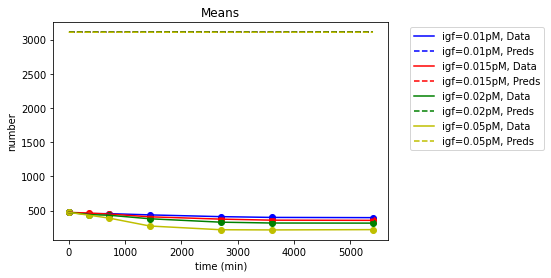

Text(0.5, 1.0, '2nd moments')

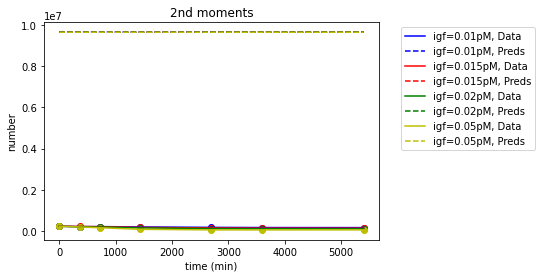

In [68]:
i = 0



read_dictionary = np.load(spec_folder + 'Arrays_for_max_ent/Cons_1213_MuS.npy',allow_pickle='TRUE').item()
real_cons = read_dictionary['array']


color_arr = ['b','r','g','y','purple','k']
for li in range(nL):
    plt.plot(t_arr,real_cons[i:i+nT], c = color_arr[li], label = f'igf={L_arr[li]}pM, Data')
    plt.scatter(t_arr,real_cons[i:i+nT], c = color_arr[li])
    plt.plot(t_arr,preds[i:i+nT], '--',c = color_arr[li],label = f'igf={L_arr[li]}pM, Preds')
    i=i+nT
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('time (min)')
plt.ylabel('number')
plt.title('Means')
plt.show()

color_arr = ['b','r','g','y','purple','k']
for li in range(nL):
    plt.plot(t_arr,real_cons[i:i+nT], c = color_arr[li], label = f'igf={L_arr[li]}pM, Data')
    plt.scatter(t_arr,real_cons[i:i+nT], c = color_arr[li])
    plt.plot(t_arr,preds[i:i+nT], '--',c = color_arr[li],label = f'igf={L_arr[li]}pM, Preds')
    i=i+nT
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('time (min)')
plt.ylabel('number')
plt.title('2nd moments')

### Printing the lagrange multipliers and the exponent vector

In [27]:
# #### calculate constriants order of mag 

for i in range(LatestIterI):
    
    print(f'for index {i}')
    mom_np = Csv_to_Np(i, dat = 'moments')
    print(mom_np.shape)
    print()
    cons = calculate_constraints(mom_np)
    lam = lambda_np[i,:]
    print(f'constraints for iteration {i} \n {cons}')
    print()

    print(f'lagrange multipliers for iteration {i} \n {lam}')
    print()

    print(f'exponent vector -  iteration {i} \n {lam*cons}')
    print()
    
    print(f'exp(exponent vector) -  iteration {i} \n {np.exp(-np.sum((lam*cons)))}')
    print()

    print(f'relative error of iteration {i} \n {real_abs[i,:]}')
    print()
    print()
    print()


#     plt.plot(cons[:36], cons[:36])
#     plt.show()
#     plt.plot(cons[36:], cons[36:])
#     plt.show()
    
#     print(cons)
    
    
    
    

for index 0
(1404, 28)

constraints for iteration 0 
 [231.64169784 213.71970603 197.17576105 182.08227602 172.80047279
 170.07071383 167.63206923 231.64169784 208.58782387 190.11188994
 174.01951978 164.31871587 161.52388855 159.06242914 231.64169784
 204.50977605 184.73933897 167.99437591 158.05889545 155.25105506
 152.79590313 231.64169784 189.3950978  165.94292313 147.45958904
 137.37461553 134.64695527 132.24278443]

lagrange multipliers for iteration 0 
 [0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]

exponent vector -  iteration 0 
 [0.02316417 0.02137197 0.01971758 0.01820823 0.01728005 0.01700707
 0.01676321 0.02316417 0.02085878 0.01901119 0.01740195 0.01643187
 0.01615239 0.01590624 0.02316417 0.02045098 0.01847393 0.01679944
 0.01580589 0.01552511 0.01527959 0.02316417 0.01893951 0.01659429
 0.01474596 0.01373746 0.0134647 

In [ ]:


def new_params(pars_old,  upperbound, lowerbound , beta =.07 ):
    """Returns new parameters """
    # pars_old is of length 8 
    npoints = len(pars_old)
    # nchange is the number of parameters that will be updates (chosen at random)
    nchange = np.random.randint(1,5)
#     print('changing nchange ', nchange, ' indices')
    delta = .5*abs(upperbound - lowerbound )


    idx = random.sample(range(0,npoints),nchange)

    newpars = pars_old.copy()

    newpars[idx] = newpars[idx] + beta*(2*np.random.rand(nchange)-1)*delta[idx]
    return newpars

# beta in the above code becomes param range later on 




In [4]:
import numpy as np 
nchange = 10
2*np.random.rand(nchange)-1

array([-0.31456199, -0.85114167,  0.68697955, -0.3068769 ,  0.77063354,
        0.81977843,  0.38759006,  0.1728604 , -0.73172816,  0.12142114])